In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('train data:', train_images.shape)
print('test data:', test_images.shape)

train data: (60000, 28, 28)
test data: (10000, 28, 28)


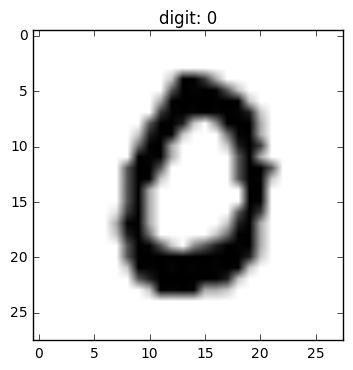

In [3]:
i = np.random.randint(0, len(train_images))
digit = train_images[i]
plt.imshow(digit, cmap=plt.cm.binary)
plt.title('digit: %d' % train_labels[i])
plt.show()

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print('train label in original notation:', train_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('train label in categorical notation:', train_labels)

train label in original notation: [5 0 4 ... 5 6 8]
train label in categorical notation: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.2579 - acc: 0.9253

In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9811
